In [8]:
from keckcode.deimos import deimosmask1d
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
file_loc = '../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/*'

In [3]:
file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'spec1d' in p and 'B0445' in p:
        if '.fits' in p:
            file_list.append(p)

In [4]:
file_list

['../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0030-B0445+123_LRISr_2020Dec13T085600.413.fits',
 '../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0032-B0445+123_LRISr_2020Dec13T102324.288.fits',
 '../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0031-B0445+123_LRISr_2020Dec13T093939.802.fits',
 '../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0033-B0445+123_LRISr_2020Dec13T110703.072.fits',
 '../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0029-B0445+123_LRISr_2020Dec13T081213.421.fits']

In [6]:
specid = []

for fl in file_list:
    spec = deimosmask1d.DeimosMask1d(fl)
    info = spec.slitinfo
    print(info)
    s = []
    for i in range(spec.nspec):
        spec_id = '%d_%d_%d_%d' % (info['det'][i], info['slitid'][i], info['objid'][i], info['spatloc'][i])
        s.append(spec_id)
    specid.append(s)
print(specid)

Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0030-B0445+123_LRISr_2020Dec13T085600.413.fits
det slitid objid spatloc        fwhm      
--- ------ ----- ------- -----------------
  2    289     1     124 15.98037248156149
  2    289     2     341 10.23090513884553
Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0032-B0445+123_LRISr_2020Dec13T102324.288.fits
det slitid objid spatloc        fwhm      
--- ------ ----- ------- -----------------
  2    289     1     126 15.33722710482591
  2    289     2     343  9.73286982025602
Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0031-B0445+123_LRISr_2020Dec13T093939.802.fits
det slitid objid spatloc        fwhm      
--- ------ ----- ------- -----------------
  2    289     1     123 15.66516143850226
  2    289     2     340 9.978781217027436
R

Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0030-B0445+123_LRISr_2020Dec13T085600.413.fits
Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0032-B0445+123_LRISr_2020Dec13T102324.288.fits
Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0031-B0445+123_LRISr_2020Dec13T093939.802.fits
Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0033-B0445+123_LRISr_2020Dec13T110703.072.fits
Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0029-B0445+123_LRISr_2020Dec13T081213.421.fits


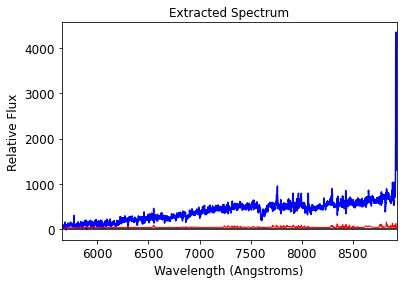

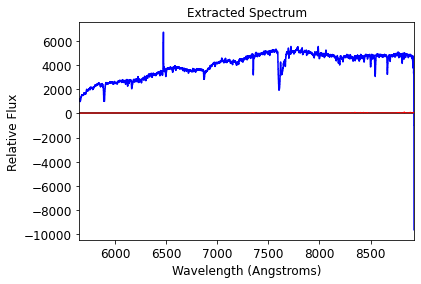

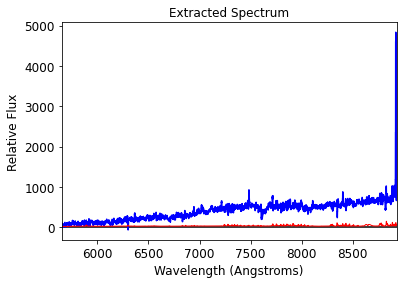

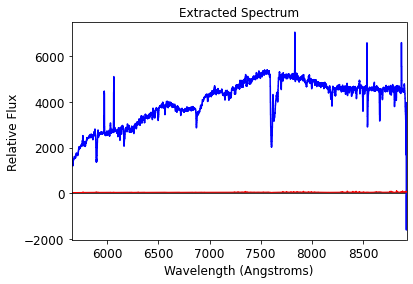

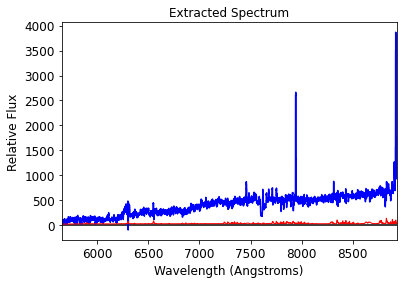

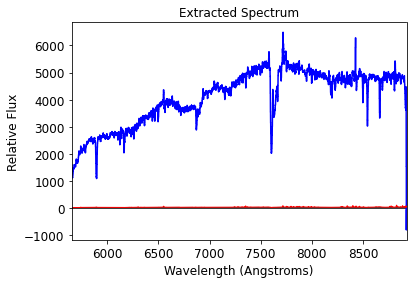

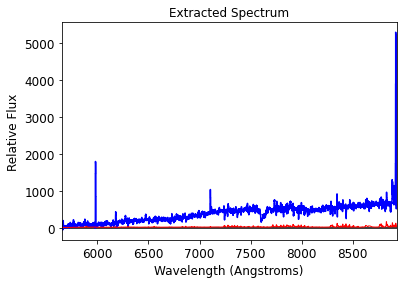

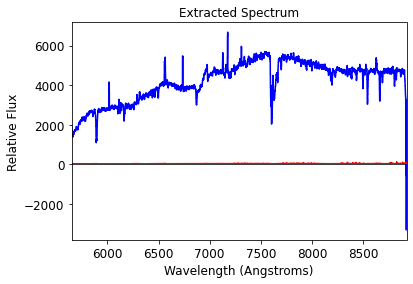

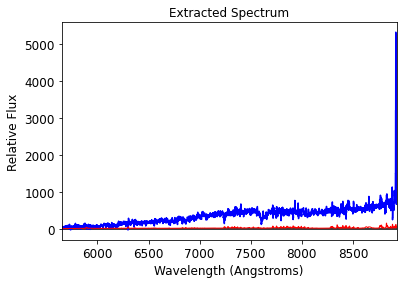

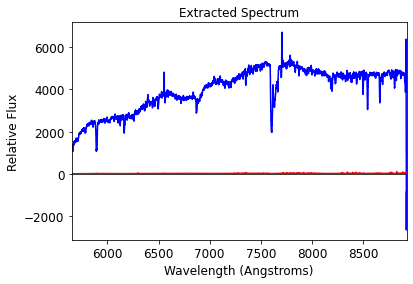

In [7]:
for sid, fl in zip(specid, file_list):
    spec = deimosmask1d.DeimosMask1d(fl)
    for i in range(spec.nspec):
        spec[sid[i]].smooth(5)

In [9]:
resp_sp = spec1d.Spec1d('../other_spectra/response_curve_from_feige110_r12132020.txt')


Reading spectrum from ../other_spectra/response_curve_from_feige110_r12132020.txt
Expected file format: text
 Spectrum Start:  5649.45
 Spectrum End:     8924.96
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



### response correct and then coadd 1d spectra

Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0030-B0445+123_LRISr_2020Dec13T085600.413.fits
 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



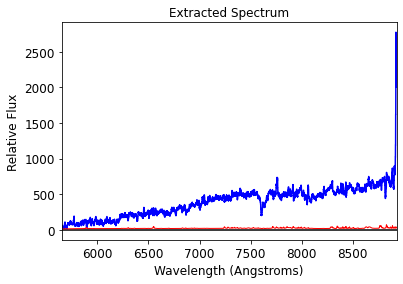

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


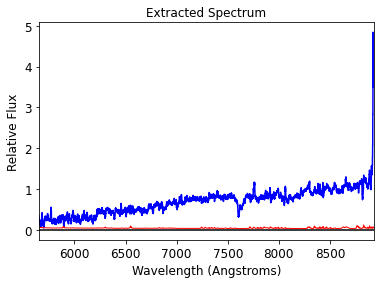

Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0032-B0445+123_LRISr_2020Dec13T102324.288.fits
 Spectrum Start:  5651.47
 Spectrum End:     8927.30
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



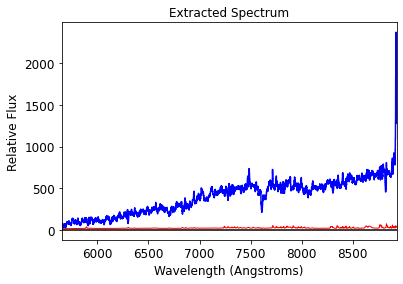

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


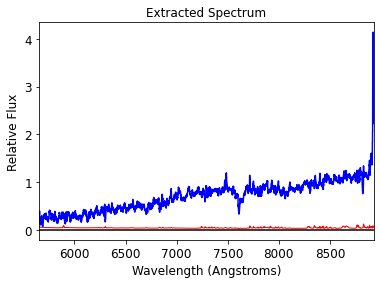

resample: replacing input spectrum with resampled version
 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



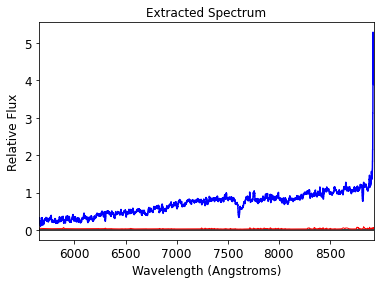

Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0031-B0445+123_LRISr_2020Dec13T093939.802.fits
 Spectrum Start:  5651.76
 Spectrum End:     8927.60
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



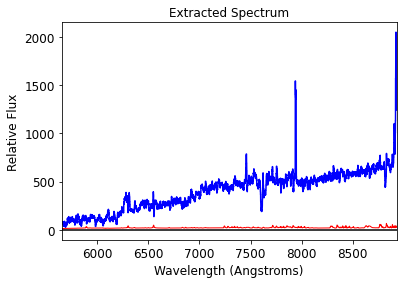

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


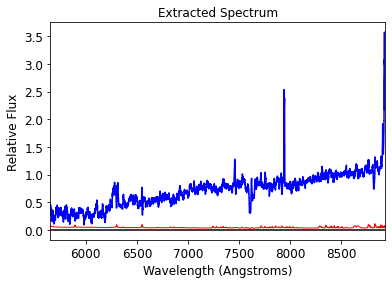

resample: replacing input spectrum with resampled version
 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



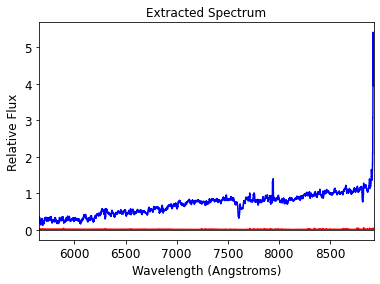

Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0033-B0445+123_LRISr_2020Dec13T110703.072.fits
 Spectrum Start:  5651.30
 Spectrum End:     8927.11
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



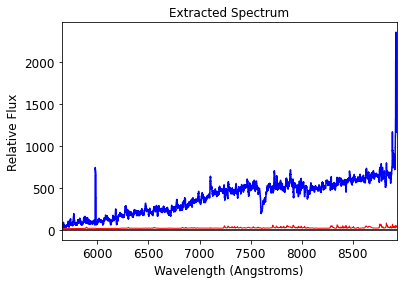

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


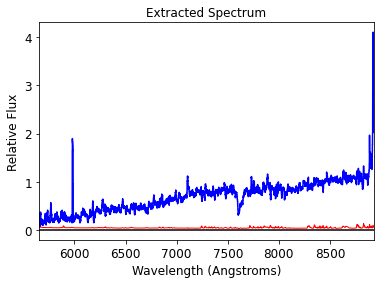

resample: replacing input spectrum with resampled version
 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



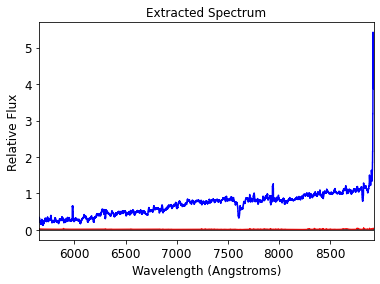

Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0029-B0445+123_LRISr_2020Dec13T081213.421.fits
 Spectrum Start:  5650.69
 Spectrum End:     8926.51
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



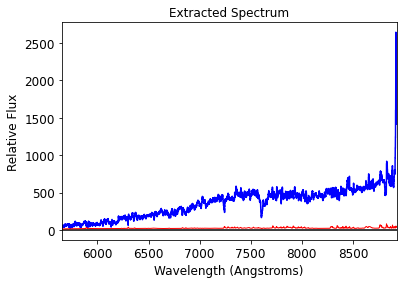

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


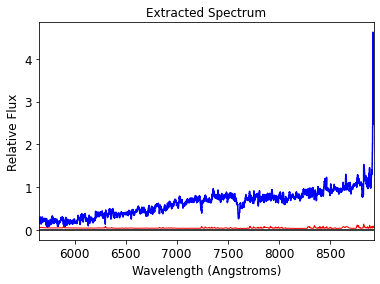

resample: replacing input spectrum with resampled version
 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



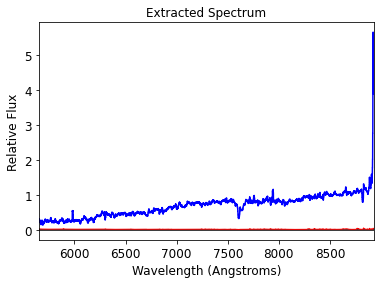

In [12]:
flag = 1
for sid, fl in zip(specid, file_list):
    spec = deimosmask1d.DeimosMask1d(fl)
    sp = spec1d.Spec1d(wav = spec[sid[0]]['wav'], flux=spec[sid[0]]['flux'], var=spec[sid[0]]['var'])
    sp.smooth(11)
    plt.show()
    resp_sp.resample(owave=sp['wav'])
    sp.resp_corr(resp_sp.rsflux*10**-2, action='divide')
    sp.smooth(11)
    plt.show()
    if flag:
        coadd_de = sp
        flag = 0
    else:
        sp.resample(owave=coadd_de['wav'], resamp_var=True)
        resampled_sp = spec1d.Spec1d(wav=sp.rswav, flux=sp.rsflux,
                                     var=sp.rsvar)
        coadd_de = coadd_de.__add__(resampled_sp)
        coadd_de.smooth(11)
        plt.show()

In [14]:
coadd_de.save('B0445_LRIS_spectra/spec1d_B0445_pypeit_respcor_coadd1d_deflector.fits', outformat='fits')

Saved spectrum to file B0445_LRIS_spectra/spec1d_B0445_pypeit_respcor_coadd1d_deflector.fits in format fits


### coadd 1d spectra without response correction.

Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0030-B0445+123_LRISr_2020Dec13T085600.413.fits
 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



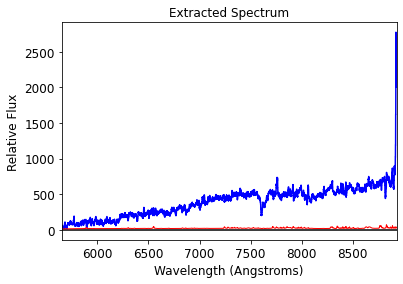

Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0032-B0445+123_LRISr_2020Dec13T102324.288.fits
 Spectrum Start:  5651.47
 Spectrum End:     8927.30
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



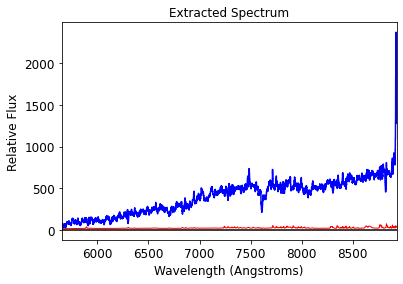

resample: replacing input spectrum with resampled version
 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



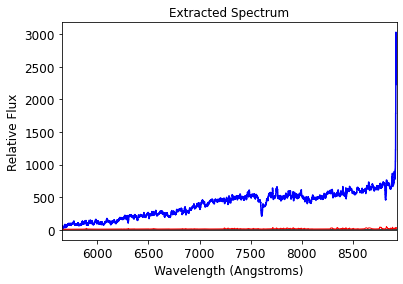

Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0031-B0445+123_LRISr_2020Dec13T093939.802.fits
 Spectrum Start:  5651.76
 Spectrum End:     8927.60
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



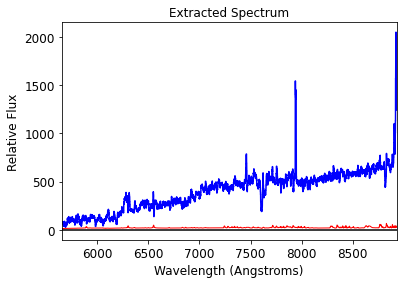

resample: replacing input spectrum with resampled version
 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



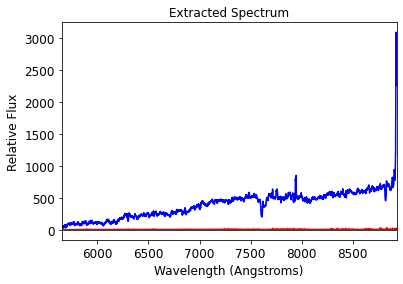

Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0033-B0445+123_LRISr_2020Dec13T110703.072.fits
 Spectrum Start:  5651.30
 Spectrum End:     8927.11
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



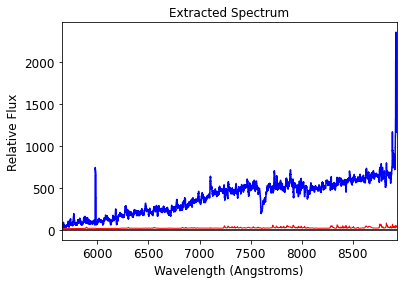

resample: replacing input spectrum with resampled version
 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



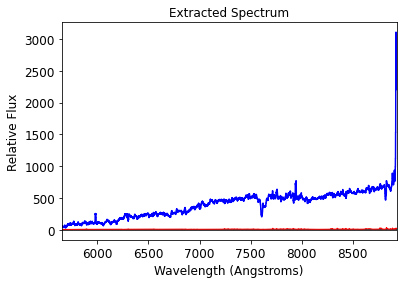

Reading 2 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0029-B0445+123_LRISr_2020Dec13T081213.421.fits
 Spectrum Start:  5650.69
 Spectrum End:     8926.51
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



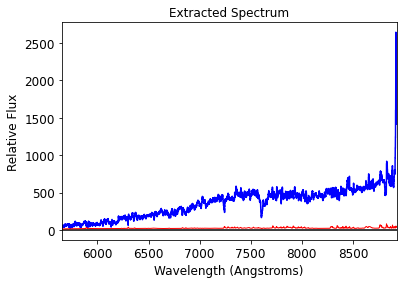

resample: replacing input spectrum with resampled version
 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5651.28
 Spectrum End:     8927.10
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



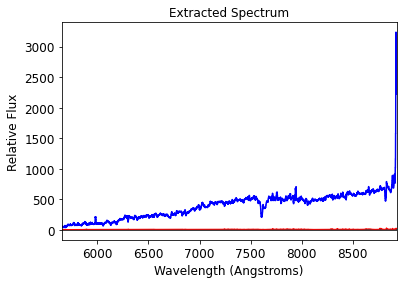

In [15]:
flag = 1
for sid, fl in zip(specid, file_list):
    spec = deimosmask1d.DeimosMask1d(fl)
    sp = spec1d.Spec1d(wav = spec[sid[0]]['wav'], flux=spec[sid[0]]['flux'], var=spec[sid[0]]['var'])
    sp.smooth(11)
    plt.show()
    if flag:
        coadd_de = sp
        flag = 0
    else:
        sp.resample(owave=coadd_de['wav'], resamp_var=True)
        resampled_sp = spec1d.Spec1d(wav=sp.rswav, flux=sp.rsflux,
                                     var=sp.rsvar)
        coadd_de = coadd_de.__add__(resampled_sp)
        coadd_de.smooth(11)
        plt.show()

In [16]:
coadd_de.save('B0445_LRIS_spectra/spec1d_B0445_pypeit_coadd1d_deflector.fits', outformat='fits')

Saved spectrum to file B0445_LRIS_spectra/spec1d_B0445_pypeit_coadd1d_deflector.fits in format fits
